In [21]:
import yfinance as yf
import pandas as pd

tickers_list = ['AAPL', 'IBM', 'AMZN', 'FB', 'BAC', 'GOOG', 'HUBS', 'SAP', 'HP', 'NVDA']
data = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2020-12-12','2021-05-05')['Adj Close']
data.to_excel('Активы.xlsx')
data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,IBM,AMZN,FB,BAC,GOOG,HUBS,SAP,HP,NVDA
Date,,,,,,,,,,
2020-12-11,122.020096,121.276245,3116.419922,273.549988,28.428797,1781.770020,391.339996,118.897667,25.085621,520.350403
2020-12-14,121.392097,120.554077,3156.969971,274.190002,28.080526,1760.060059,381.970001,119.350235,23.906172,532.166260
2020-12-15,127.472664,122.896263,3165.120117,275.549988,28.498449,1767.770020,379.899994,121.081802,24.699078,534.235596
2020-12-16,127.402893,122.525414,3240.959961,275.670013,28.578054,1763.000000,378.540009,122.980621,24.520674,529.517212
2020-12-17,128.290054,122.525414,3236.080078,274.480011,28.687511,1747.900024,393.809998,126.591331,25.016241,533.465881


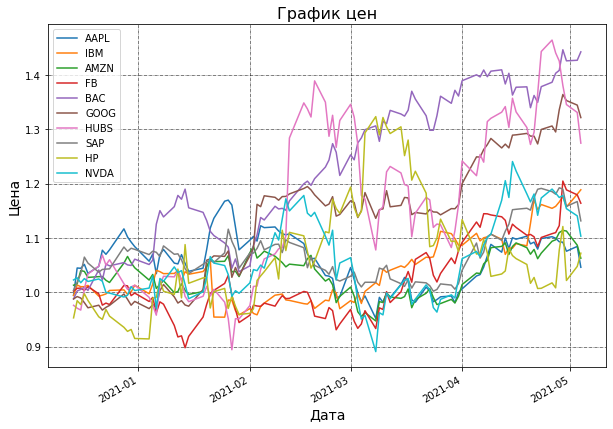

In [53]:
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))
plt.legend()
plt.title("График цен", fontsize=16)
plt.ylabel('Цена', fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

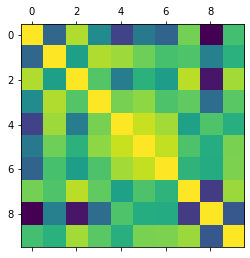

In [52]:
import matplotlib.pyplot as plt

plt.matshow(data.corr())
plt.show()

In [63]:
from requests import get
import pandas as pd
from datetime import datetime
from tqdm.notebook import tqdm

domain = 'itnews_vk'
url = 'https://api.vk.com/method/wall.get'
params = {'access_token':'982e1ca0982e1ca0982e1ca072985973839982e982e1ca0f857a0b34c99045afea36fc8',
          'v':'5.130',
          'domain':domain,
          'count':1
         }
inf_0 = get(url, params = params)
posts_count = inf_0.json()['response']['count']
id_list = []
date_list = []
text_list = []
comment_list = []
like_list = []
repost_list = []
views_list = []
offsets_list = list(range(0,posts_count+1,10000))
params['count'] = 10000
for offset in tqdm(offsets_list):
    params['offset'] = offset
    inf_0 = get(url, params = params)
    for post in inf_0.json()['response']['items']:
        if 'id' and 'date' and 'text' and 'comments' and 'likes' and 'reposts' and 'views' in list(post.keys())
            id_list.append(post['id'])
            date_list.append(datetime.fromtimestamp(post['date']).strftime('%d.%m.%Y'))
            text_list.append(post['text'])
            comment_list.append(post['comments']['count'])
            like_list.append(post['likes']['count'])
            repost_list.append(post['reposts']['count'])
            views_list.append(post['views']['count'])      
vk_df = pd.DataFrame(list(zip(id_list, date_list, text_list, views_list, like_list, repost_list, comment_list)))
vk_df.columns = ['ID записи',
                 'Дата записи',
                 'Текст записи',
                 'Число просмотров',
                 'Число лайков',
                 'Число репостов',
                 'Число комментариев'
                ]
vk_df.to_excel('информация_со_стены.xlsx')
vk_df

Извлечение записей со стены сообщества


,ID записи,Дата записи,Текст записи,Число просмотров,Число лайков,Число репостов,Число комментариев
0,14539,14.05.2021,"Дизайнер показал, как Apple может убрать вырез...",313,5,3,2
1,14538,14.05.2021,OnePlus Watch Cobalt Edition: премиальная верс...,279,6,5,0
2,14536,14.05.2021,В России заблокирован сайт и форум 4PDA\n\nРеш...,1004,17,17,0
3,14535,14.05.2021,ASUS представила вакуумную игровую гарнитуру R...,720,5,3,0
4,14531,14.05.2021,"Макеты iPhone 13, 13 Pro и 13 Pro Max на фото ...",344,4,1,1
...,...,...,...,...,...,...,...
95,14284,06.05.2021,Складной Google Pixel Fold на концепт-видео.,358,3,2,0
96,14283,06.05.2021,XDA: Xiaomi работает над тремя планшетами с эк...,265,1,0,0
97,14282,06.05.2021,Пользователи Reddit хотят купить остров и созд...,770,7,8,0
98,14281,06.05.2021,Какие смартфоны обновятся до MIUI 13? Список о...,719,3,2,1
